### Preliminary data analysis for CS591 Project on secondary shoe market StockX.com
###### by David Neary and Anton Njavro

In [221]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import gc

In [228]:
#Load our data
stockx_2019_data = pd.read_csv('data/2019_data_stockx.csv')

In [229]:
#Edit dates to datetime format YYY/MM/DD
stockx_2019_data['Order Date'] = pd.to_datetime(stockx_2019_data['Order Date'])
stockx_2019_data['Release Date'] = pd.to_datetime(stockx_2019_data['Release Date'])
#Add column containing day difference between Release Date and Order Date
stockx_2019_data['Date Difference'] = abs((stockx_2019_data['Release Date'] - stockx_2019_data['Order Date']).apply(days))

In [230]:
stockx_2019_data.head(10)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Date Difference
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,2016-09-24,11.0,California,342
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,2016-11-23,11.0,California,282
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,2016-11-23,11.0,California,282
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,2016-11-23,11.5,Kentucky,282
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2017-02-11,11.0,Rhode Island,202
5,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2017-02-11,8.5,Michigan,202
6,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,$784,$220,2016-12-17,11.0,California,258
7,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$460,$220,2017-04-29,10.0,New York,125
8,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,2017-04-29,11.0,Kansas,125
9,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,2017-04-29,11.0,Florida,125


In [176]:
stockx_2019_data.shape

(99956, 8)

In [234]:
#List of Brands
brands = stockx_2019_data.Brand.unique()
#List of dates
dates = stockx_2019_data['Order Date'].unique()
#List of sneaker names
sneaker_names = stockx_2019_data['Sneaker Name'].unique()
#Shoe sizes
shoe_sizes = sorted(stockx_2019_data['Shoe Size'].unique())
#Buyer State
buyer_state = stockx_2019_data['Buyer Region'].unique()
#Release dates
release_dates = stockx_2019_data['Release Date'].unique()
#Date difference
date_difference = sorted(stockx_2019_data['Date Difference'].unique())

our_lists = [brands,dates,sneaker_names,shoe_sizes,buyer_state,release_dates] 

In [256]:
#Calculate percentages
#Percentage between Yeezy/Off-White
brand_percentage = stockx_2019_data['Brand'].value_counts(normalize=True) * 100
#Gives top 25 states, 92.8% of all sales
state_percentage = stockx_2019_data['Buyer Region'].value_counts(normalize=True)[:25] * 100
#Shoe Size percentages
shoe_size_percentage = stockx_2019_data['Shoe Size'].value_counts(normalize=True) * 100
#Shoe models percentages (top 25 of shoe_models are 91% of sales)
shoe_models_percentage = stockx_2019_data['Sneaker Name'].value_counts(normalize=True) * 100
#Dates percentages (Top 2 dates are related to Yeezy releases)
dates_percentage = stockx_2019_data['Order Date'].value_counts(normalize=True) * 100
#Date Difference percentages (Info, 10% of all sales happen within 2 days of release, 22% of all sales happen within 9 dates)
date_difference_percentage = stockx_2019_data['Date Difference'].value_counts(normalize=True) * 100

In [259]:
#date_difference_percentage[:10]

In [132]:
#Function to plot Pie-charts
def pie_chart(labels,sizes):
    #explode = (0, 0.1, 0, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()

#Extract labels from percentages
def extract_label_list(given_np_list):
    #Return 2 lists, 1st: [labels], 2nd: [percentages]
    #given_np_list
    label_list = []
    pct_list = []
    for i in range(len(given_np_list)):
        #print(given_np_list[i])
        label_list.append(given_np_list[given_np_list==given_np_list[i]].index[0])
        pct_list.append(given_np_list[i])
    print(label_list)
    return label_list, pct_list
        

[' Yeezy', 'Off-White']


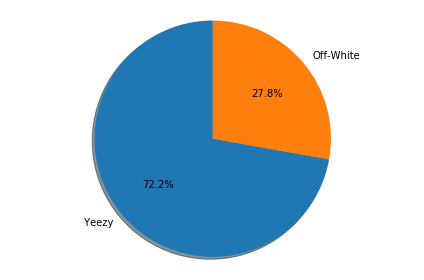

In [133]:
#Brands Pie-Chart
brand_label,brand_pct = extract_label_list(brand_percentage)
pie_chart(brand_label,brand_pct)

['California', 'New York', 'Oregon', 'Florida', 'Texas', 'New Jersey', 'Illinois', 'Pennsylvania', 'Massachusetts', 'Michigan']


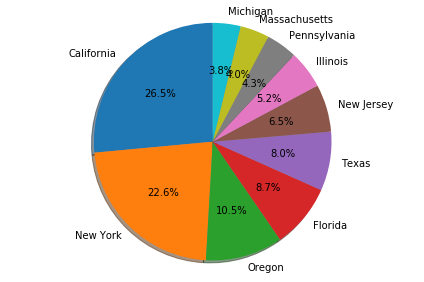

In [135]:
#State Percentages (Only for top 10 states)
state_label, state_pct = extract_label_list(state_percentage[:10])
pie_chart(state_label,state_pct)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


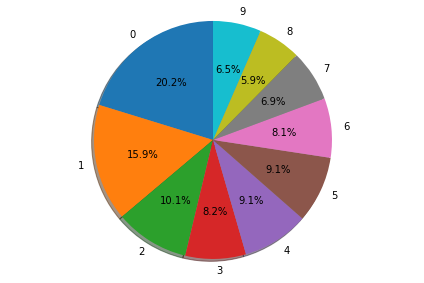

In [258]:
#Percentage of sales within release date (Only for top 10 differences)
date_difference_label, date_difference_pct = extract_label_list(date_difference_percentage[:10])
pie_chart(date_difference_label,date_difference_pct)